In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from pandas_profiling import ProfileReport
import os

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [2]:
import pyreadstat

# Data exploration

In [3]:
data, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')

In [4]:
data

CustID  FirstPolYear  BirthYear          EducDeg  MonthSal  \
0          1.0        1985.0     1982.0  2 - High School    2177.0   
1          2.0        1981.0     1995.0  2 - High School     677.0   
2          3.0        1991.0     1970.0        1 - Basic    2277.0   
3          4.0        1990.0     1981.0      3 - BSc/MSc    1099.0   
4          5.0        1986.0     1973.0      3 - BSc/MSc    1763.0   
...        ...           ...        ...              ...       ...   
10291  10292.0        1984.0     1949.0          4 - PhD    3188.0   
10292  10293.0        1977.0     1952.0        1 - Basic    2431.0   
10293  10294.0        1994.0     1976.0      3 - BSc/MSc    2918.0   
10294  10295.0        1981.0     1977.0        1 - Basic    1971.0   
10295  10296.0        1990.0     1981.0          4 - PhD    2815.0   

       GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
0             1.0       1.0      380.97        0.39     375.85          79.45   
1             4.0       1.0     -131.13        1.12      77.46         416.20   
2             3.0       0.0      504.67        0.28     206.15         224.50   
3             4.0       1.0      -16.99        0.99     182.48          43.35   
4             4.0       1.0       35.23        0.90     338.62          47.80   
...           ...       ...         ...         ...        ...            ...   
10291         2.0       0.0       -0.11        0.96     393.74          49.45   
10292         3.0       0.0     1405.60        0.00     133.58        1035.75   
10293         1.0       1.0      524.10        0.21     403.63         132.80   
10294         2.0       1.0      250.05        0.65     188.59         211.15   
10295         1.0       1.0      463.75        0.27     414.08          94.45   

       PremHealth  PremLife  PremWork  
0          146.36     47.01     16.89  
1          116.69    194.48    106.13  
2          124.58     86.35     99.02  
3          311.17     35.34     28.34  
4          182.59     18.78     41.45  
...           ...       ...       ...  
10291      173.81      9.78     14.78  
10292      143.25     12.89    105.13  
10293      142.25     12.67      4.89  
10294      198.37     63.90    112.91  
10295      141.25      6.89     12.89  

[10296 rows x 14 columns]

In [5]:
data.describe()

CustID  FirstPolYear     BirthYear      MonthSal    GeoLivArea  \
count  10296.00000  10266.000000  10279.000000  10260.000000  10295.000000   
mean    5148.50000   1991.062634   1968.007783   2506.667057      2.709859   
std     2972.34352    511.267913     19.709476   1157.449634      1.266291   
min        1.00000   1974.000000   1028.000000    333.000000      1.000000   
25%     2574.75000   1980.000000   1953.000000   1706.000000      1.000000   
50%     5148.50000   1986.000000   1968.000000   2501.500000      3.000000   
75%     7722.25000   1992.000000   1983.000000   3290.250000      4.000000   
max    10296.00000  53784.000000   2001.000000  55215.000000      4.000000   

           Children     CustMonVal    ClaimsRate     PremMotor  PremHousehold  \
count  10275.000000   10296.000000  10296.000000  10262.000000   10296.000000   
mean       0.706764     177.892605      0.742772    300.470252     210.431192   
std        0.455268    1945.811505      2.916964    211.914997     352.595984   
min        0.000000 -165680.420000      0.000000     -4.110000     -75.000000   
25%        0.000000      -9.440000      0.390000    190.590000      49.450000   
50%        1.000000     186.870000      0.720000    298.610000     132.800000   
75%        1.000000     399.777500      0.980000    408.300000     290.050000   
max        1.000000   11875.890000    256.200000  11604.420000   25048.800000   

         PremHealth      PremLife      PremWork  
count  10253.000000  10192.000000  10210.000000  
mean     171.580833     41.855782     41.277514  
std      296.405976     47.480632     51.513572  
min       -2.110000     -7.000000    -12.000000  
25%      111.800000      9.890000     10.670000  
50%      162.810000     25.560000     25.670000  
75%      219.820000     57.790000     56.790000  
max    28272.000000    398.300000   1988.700000

In [6]:
data[data['EducDeg']=='']

CustID  FirstPolYear  BirthYear EducDeg  MonthSal  GeoLivArea  Children  \
896    897.0           NaN     1960.0            2643.0         1.0       1.0   
1707  1708.0        1992.0     1946.0            3827.0         4.0       0.0   
2449  2450.0           NaN     1939.0            4465.0         4.0       0.0   
2728  2729.0           NaN     1954.0            3200.0         2.0       0.0   
2770  2771.0           NaN     1984.0            1473.0         4.0       1.0   
3056  3057.0           NaN     1977.0            2221.0         1.0       1.0   
4423  4424.0           NaN     1962.0            2688.0         1.0       1.0   
6535  6536.0           NaN     1968.0            2413.0         3.0       1.0   
6560  6561.0        1976.0     1992.0               NaN         4.0       1.0   
7321  7322.0           NaN     1942.0            3346.0         4.0       0.0   
7470  7471.0           NaN     1949.0            3211.0         4.0       0.0   
8081  8082.0           NaN     1940.0            4216.0         4.0       1.0   
8173  8174.0           NaN     1951.0            4183.0         1.0       0.0   
8303  8304.0           NaN     1938.0            3729.0         3.0       0.0   
9136  9137.0           NaN     1993.0            1753.0         1.0       1.0   
9312  9313.0           NaN     1974.0            2552.0         1.0       1.0   
9610  9611.0           NaN     1964.0            2905.0         1.0       1.0   

      CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
896       -25.00        1.00     515.54          33.90       47.01     12.89   
1707      355.52        0.33     222.71         146.70         NaN     94.13   
2449      457.75        0.36     338.73         187.25      175.81     43.23   
2728      109.25        0.77     211.93          14.45      275.72     77.68   
2770      443.74        0.31     386.74         104.45      156.92      5.00   
3056       -9.22        0.97     475.09          15.00       93.35     15.78   
4423      481.99        0.09     533.99         -30.00       52.01      3.00   
6535      420.86        0.28     472.31          48.35       56.90     26.45   
6560       85.91        0.77      91.24           0.00      227.60     60.01   
7321      173.47        0.73     139.47         177.80      281.61    120.80   
7470      261.50        0.66     213.82         323.95      197.26     37.34   
8081      320.40        0.56     376.96         212.25      158.14     11.78   
8173      173.04        0.75     178.59         246.70      251.38     50.12   
8303       17.45        0.93     254.38          63.90      290.61     11.67   
9136      464.86        0.41      49.23         280.60      172.70    163.92   
9312      458.20        0.28     468.31         102.25       79.46      6.78   
9610      -70.34        1.06     273.72         211.70      229.60      9.89   

      PremWork  
896       3.78  
1707    105.24  
2449      4.78  
2728     11.67  
2770     27.45  
3056      2.78  
4423       NaN  
6535     16.67  
6560    110.91  
7321     20.67  
7470     74.79  
8081     31.56  
8173     69.57  
8303     21.45  
9136    160.03  
9312     14.89  
9610     45.34

In [7]:
data.dtypes

CustID           float64
FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [8]:
data.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg            0
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [9]:
#pd.set_option('display.max_rows', 100000)
pd.option_context('display.max_columns', None, 
                  'display.max_rows', None, 
                  'display.width', None, 
                  'display.max_colwidth', 0)


In [10]:
# 'EducDeg' is still an object but it will be treated further
data.dtypes

CustID           float64
FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [11]:
# replace "" by nans
data.replace("", np.nan, inplace=True)

# count of missing values
data.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [12]:
# pd.Int32Dtype() due to nan values
data['CustID']=data['CustID'].astype(pd.Int32Dtype())
data['FirstPolYear']=data['FirstPolYear'].astype(pd.Int32Dtype())
data['BirthYear']=data['BirthYear'].astype(pd.Int32Dtype())
#data['Children']=data['Children'].astype('boolean')
data['GeoLivArea']=data['GeoLivArea'].astype(pd.Int32Dtype())
data['CustMonVal']=data['CustMonVal'].astype('float32')
data['ClaimsRate']=data['ClaimsRate'].astype('float32')
data['PremMotor']=data['PremMotor'].astype('float32')
data['PremHousehold']=data['PremHousehold'].astype('float32')
data['PremHealth']=data['PremHealth'].astype('float32')
data['PremLife']=data['PremLife'].astype('float32')
data['PremWork']=data['PremWork'].astype('float32')

In [13]:
data.dtypes

CustID             Int32
FirstPolYear       Int32
BirthYear          Int32
EducDeg           object
MonthSal         float64
GeoLivArea         Int32
Children         float64
CustMonVal       float32
ClaimsRate       float32
PremMotor        float32
PremHousehold    float32
PremHealth       float32
PremLife         float32
PremWork         float32
dtype: object

In [15]:
# Check for duplicated rows
data.duplicated().sum()

0

# Outliers 

In [16]:
non_metric_features = ["EducDeg", "CustID","Children","FirstPolYear"]
metric_features1 = ["CustMonVal","ClaimsRate","PremHousehold"]
metric_features = data.columns.drop(non_metric_features).to_list()

In [23]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features1) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features1): # Notice the zip() function and flatten() method
    ax.hist(data[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22004/1438305387.py:20: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [24]:
plt.hist(data["CustMonVal"], bins=20)  # mess around with the bins
plt.title("CustMonVal", y=-0.2)

plt.show()

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_22004/3013548181.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


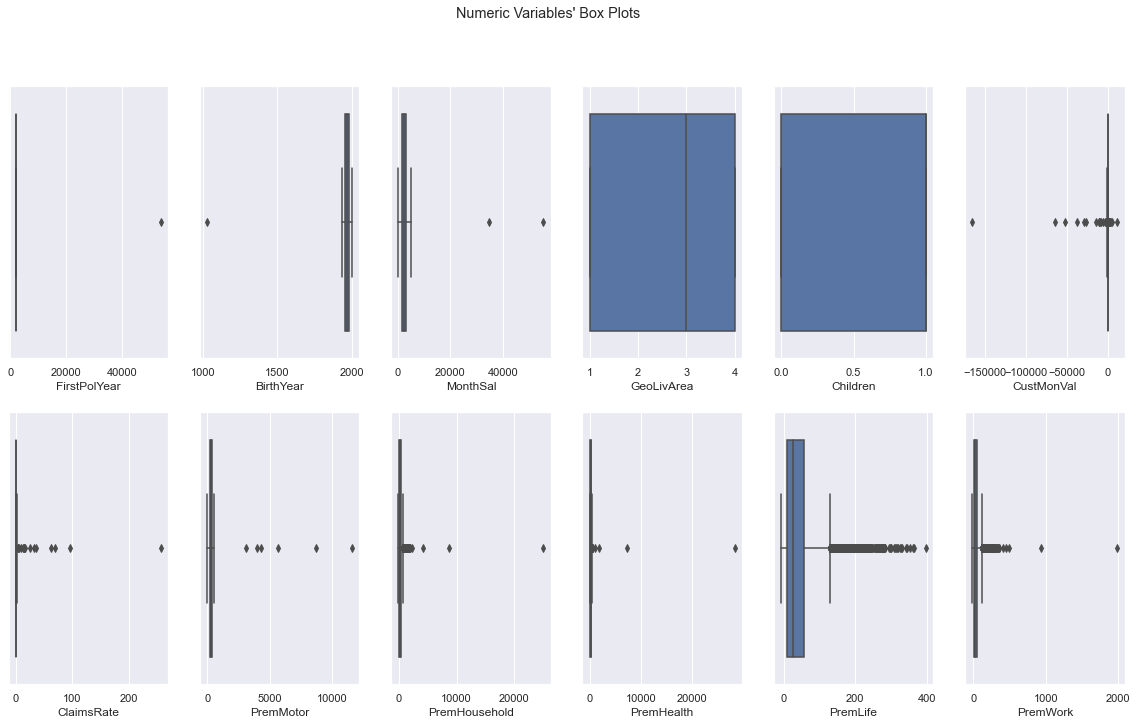

In [16]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

#plt.savefig(os.path.join('..', 'figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

# Coeherence Check

In [65]:
print(data[(data['PremMotor']>0) & (data['BirthYear']>(2016-18))])
print(data[(data['PremWork']>0) & (data['BirthYear']>(2016-18))])
print(data[(data['PremHousehold']>0) & (data['BirthYear']>(2016-18))])
# cuidado com os nan FirstPolYear
print(data[data['FirstPolYear']<data['BirthYear']])
print(data[(data['Children']==1) & (data['BirthYear']>(2016-11))])
data[(data['EducDeg']=='4 - PhD') & (data['BirthYear']>(2016-13))]


       CustID  FirstPolYear  BirthYear    EducDeg  MonthSal  GeoLivArea  \
13         14          1983       2000  1 - Basic    1043.0           3   
186       187          1993       1999  1 - Basic    1247.0           2   
397       398          1986       2000  1 - Basic     415.0           1   
480       481          1984       1999  1 - Basic    1581.0           4   
526       527          1982       1999  1 - Basic     840.0           4   
620       621          1983       1999  1 - Basic     578.0           1   
659       660          1991       2001  1 - Basic    1284.0           4   
689       690          1997       2001  1 - Basic    1180.0           3   
865       866          1979       2001  1 - Basic     562.0           1   
893       894          1978       2000  1 - Basic     698.0           4   
900       901          1979       2000  1 - Basic     845.0           1   
1063     1064          1996       1999  1 - Basic     974.0           3   
1336     1337          19

       CustID  FirstPolYear  BirthYear          EducDeg  MonthSal  GeoLivArea  \
1           2          1981       1995  2 - High School     677.0           4   
13         14          1983       2000        1 - Basic    1043.0           3   
18         19          1981       1982        1 - Basic    1414.0           3   
22         23          1976       1986  2 - High School    1495.0           1   
40         41          1994       1995  2 - High School    1177.0           4   
44         45          1985       1990      3 - BSc/MSc    1065.0           1   
46         47          1976       1986      3 - BSc/MSc    1219.0           4   
71         72          1985       1989      3 - BSc/MSc    1159.0           4   
95         96          1976       1986      3 - BSc/MSc    2668.0           4   
105       106          1986       1988      3 - BSc/MSc    2019.0           4   
108       109          1991       1995        1 - Basic     764.0           4   
134       135          1976 

Empty DataFrame
Columns: [CustID, FirstPolYear, BirthYear, EducDeg, MonthSal, GeoLivArea, Children, CustMonVal, ClaimsRate, PremMotor, PremHousehold, PremHealth, PremLife, PremWork]
Index: []

# Data Engineering

In [25]:
data.insert(4,'EducDeg_cat',data['EducDeg'].str[4:])

In [26]:
data.insert(5,'EducDeg_ord',data['EducDeg'].str[0])

In [27]:
data

CustID  FirstPolYear  BirthYear          EducDeg  EducDeg_cat  \
0          1.0        1985.0     1982.0  2 - High School  High School   
1          2.0        1981.0     1995.0  2 - High School  High School   
2          3.0        1991.0     1970.0        1 - Basic        Basic   
3          4.0        1990.0     1981.0      3 - BSc/MSc      BSc/MSc   
4          5.0        1986.0     1973.0      3 - BSc/MSc      BSc/MSc   
...        ...           ...        ...              ...          ...   
10291  10292.0        1984.0     1949.0          4 - PhD          PhD   
10292  10293.0        1977.0     1952.0        1 - Basic        Basic   
10293  10294.0        1994.0     1976.0      3 - BSc/MSc      BSc/MSc   
10294  10295.0        1981.0     1977.0        1 - Basic        Basic   
10295  10296.0        1990.0     1981.0          4 - PhD          PhD   

      EducDeg_ord  MonthSal  GeoLivArea  Children  CustMonVal  ClaimsRate  \
0               2    2177.0         1.0       1.0      380.97        0.39   
1               2     677.0         4.0       1.0     -131.13        1.12   
2               1    2277.0         3.0       0.0      504.67        0.28   
3               3    1099.0         4.0       1.0      -16.99        0.99   
4               3    1763.0         4.0       1.0       35.23        0.90   
...           ...       ...         ...       ...         ...         ...   
10291           4    3188.0         2.0       0.0       -0.11        0.96   
10292           1    2431.0         3.0       0.0     1405.60        0.00   
10293           3    2918.0         1.0       1.0      524.10        0.21   
10294           1    1971.0         2.0       1.0      250.05        0.65   
10295           4    2815.0         1.0       1.0      463.75        0.27   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork  
0         375.85          79.45      146.36     47.01     16.89  
1          77.46         416.20      116.69    194.48    106.13  
2         206.15         224.50      124.58     86.35     99.02  
3         182.48          43.35      311.17     35.34     28.34  
4         338.62          47.80      182.59     18.78     41.45  
...          ...            ...         ...       ...       ...  
10291     393.74          49.45      173.81      9.78     14.78  
10292     133.58        1035.75      143.25     12.89    105.13  
10293     403.63         132.80      142.25     12.67      4.89  
10294     188.59         211.15      198.37     63.90    112.91  
10295     414.08          94.45      141.25      6.89     12.89  

[10296 rows x 16 columns]